# Example of Optimizing PCA on McTorch 
borrowed from pyManopt examples

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
torch.manual_seed(0)

In [22]:
# Random data with high variance in first two dimension
X = torch.diag(torch.FloatTensor([3,2,1])).matmul(torch.randn(3,200))

In [30]:
# 1. Initialize Parameter
manifold_param = nn.Parameter(manifold=nn.Stiefel(3,2))

In [31]:
# 2. Define Cost - squared reconstruction error
def cost(X, w):
    wTX = torch.matmul(w.transpose(1,0), X)
    wwTX = torch.matmul(w, wTX)
    return torch.sum((X - wwTX)**2)


In [32]:
# 3. Optimize
optimizer = torch.optim.Adagrad(params = [manifold_param], lr=1)

In [33]:
cost_history = []

In [34]:
for epoch in range(30):
    cost_step = cost(X, manifold_param)
    cost_history.append(cost_step.item())
    cost_step.backward()
    optimizer.step()
    optimizer.zero_grad()

Text(0.5, 1.0, 'Cost per epoch')

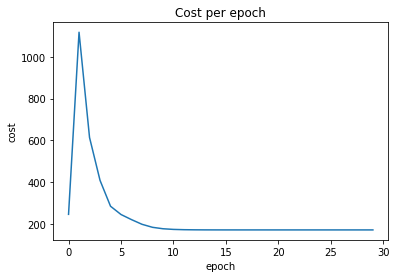

In [35]:
plt.plot(cost_history)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Cost per epoch')

In [36]:
print("Following matrix minimized the reconstruction error to {}:".format(cost(X, manifold_param)))
print(manifold_param.data)

Following matrix minimized the reconstruction error to 171.5904541015625:
tensor([[-0.9950, -0.0963],
        [ 0.0968, -0.9951],
        [-0.0235, -0.0232]])
